In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import time
from tqdm import tqdm
from sklearn.tree import export_graphviz
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("final_df.csv")

In [3]:
df.head()

,Unnamed: 0,seniorcitizen,tenure,monthlycharges,totalcharges,churn,gender_Female,gender_Male,partner_No,partner_Yes,...,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0,0,1,29.85,29.85,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,1,0,34,56.95,1889.50,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,0,2,53.85,108.15,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,3,0,45,42.30,1840.75,0,0,1,1,0,...,0,0,1,0,1,0,1,0,0,0
4,4,0,2,70.70,151.65,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [4]:
df =df.iloc[:,1:]
df.head()

,seniorcitizen,tenure,monthlycharges,totalcharges,churn,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,...,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [5]:
y = df.churn
x = df.drop("churn",axis=1)

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
min_max = MinMaxScaler()
scaled_df = pd.DataFrame(min_max.fit_transform(x),columns = x.columns)

In [8]:
scaled_df.head()

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,...,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0.0,0.013889,0.115423,0.003437,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.472222,0.385075,0.217564,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.027778,0.354229,0.012453,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.625000,0.239303,0.211951,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.027778,0.521891,0.017462,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .25, random_state = 33)

In [10]:
classification1 = DecisionTreeClassifier(random_state=33)
classification1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=33)

In [11]:
test_pred1 = classification1.predict(X_test)

In [12]:
print(f"Precision Score: {precision_score(y_test, test_pred1)}")
print(f"Recall Score: {recall_score(y_test, test_pred1)}")
print(f"Accuracy Score: {accuracy_score(y_test, test_pred1)}")
print(f"F1 Score: {f1_score(y_test, test_pred1)}")

Precision Score: 0.4922048997772829
Recall Score: 0.46041666666666664
Accuracy Score: 0.7234525837592277
F1 Score: 0.47578040904198066


Auc Score: 0.6412153590944575


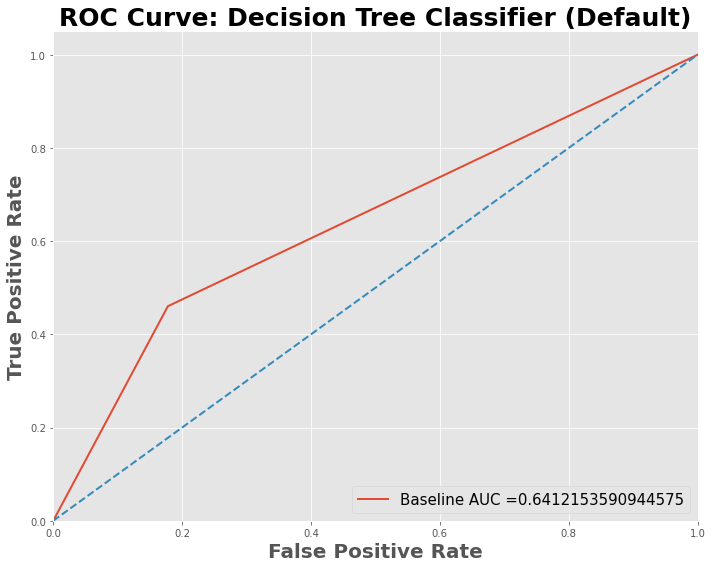

In [13]:
fpr,tpr,threshold = roc_curve(y_test,test_pred1)
roc_auc = auc(fpr,tpr)
print(f"Auc Score: {roc_auc}")

plt.style.use('ggplot')
plt.figure(figsize = (10,8))
plt.plot(fpr, tpr, lw = 2, label = 'Baseline AUC ='+str(roc_auc))
plt.plot([0,1],[0,1], linestyle = '--', lw = 2)
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate', fontsize = 20, fontweight = 'bold')
plt.ylabel('True Positive Rate', fontsize = 20, fontweight = 'bold')
plt.title('ROC Curve: Decision Tree Classifier (Default)', fontsize = 25, fontweight = 'bold')
plt.legend(loc = 4, fontsize = 15)
plt.tight_layout()

In [14]:
pd.crosstab(y_test, test_pred1, rownames = ['True'], colnames = ['Predicted'],margins = True)

Predicted,0,1,All
True,,,
0,1053,228,1281
1,259,221,480
All,1312,449,1761


In [15]:
classification2 =  DecisionTreeClassifier(random_state = 33)
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth':[None, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    'min_samples_split':[20, 25, 30, 35, 40],
    'min_samples_leaf':[1,2,3,4,5,6]
}
gs_tree = GridSearchCV(classification2, param_grid, cv = 4, verbose = True)
gs_tree.fit(X_train, y_train)

Fitting 4 folds for each of 720 candidates, totalling 2880 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2880 out of 2880 | elapsed:   50.5s finished


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=33),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                       20],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [20, 25, 30, 35, 40]},
             verbose=True)

In [16]:
print(f"Best Parameters: {gs_tree.best_params_}")
print(f"Best Score: {gs_tree.best_score_}")

Best Parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 30}
Best Score: 0.7942067820521643


In [17]:
final_clf = DecisionTreeClassifier(
    criterion = 'entropy',
    max_depth = 6,
    min_samples_leaf = 1,
    min_samples_split = 30,
    random_state = 33)
final_clf.fit(X_train, y_train)
test_pred2 = final_clf.predict(X_test)

In [18]:
print(f"Precision Score: {precision_score(y_test, test_pred2)}")
print(f"Recall Score: {recall_score(y_test, test_pred2)}")
print(f"Accuracy Score: {accuracy_score(y_test, test_pred2)}")
print(f"F1 Score: {f1_score(y_test, test_pred2)}")

Precision Score: 0.628992628992629
Recall Score: 0.5333333333333333
Accuracy Score: 0.787052810902896
F1 Score: 0.5772266065388951


AUC Score: 0.7077283372365338


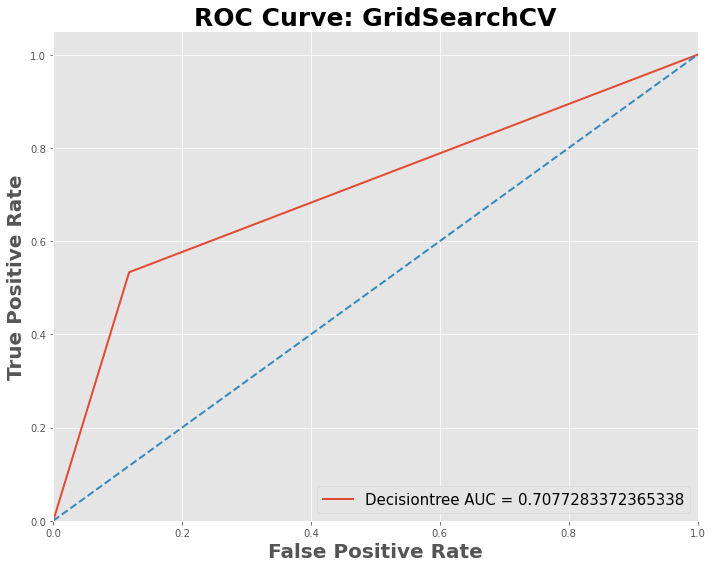

In [22]:
fpr, tpr, threshold = roc_curve(y_test, test_pred2)
roc_auc = auc(fpr, tpr)
print(f'AUC Score: {roc_auc}')

plt.style.use('ggplot')
plt.figure(figsize = (10,8))
plt.plot(fpr, tpr,lw = 2, label = 'Decisiontree AUC = '+str(roc_auc))
plt.plot([0,1],[0,1], linestyle = '--', lw = 2)
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate', fontsize = 20, fontweight = 'bold')
plt.ylabel('True Positive Rate', fontsize = 20, fontweight = 'bold')
plt.title('ROC Curve: GridSearchCV', fontsize = 25, fontweight = 'bold')
plt.legend(loc = 4, fontsize = 15)
plt.tight_layout()

In [20]:
pd.crosstab(y_test, test_pred2, rownames = ['True'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
True,,,
0,1130,151,1281
1,224,256,480
All,1354,407,1761
